In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
from scipy.stats import mode
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0


In [ ]:

df.shape

(13954, 31)

In [ ]:

df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,...,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,...,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,...,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,...,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,...,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,...,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


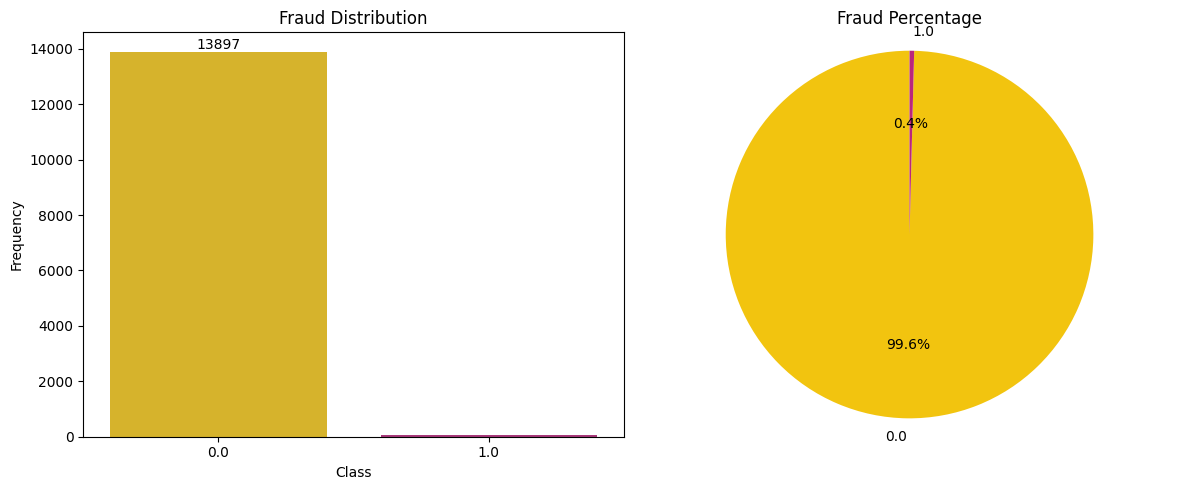

In [ ]:
colors = [(0.95, 0.77, 0.06),(0.73, 0.15, 0.49)]
df_fraud = df[["Class", "Time"]].groupby("Class")[["Time"]].count().reset_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the bar chart in the first subplot
sns.barplot(data=df_fraud, x="Class", y="Time", palette=colors, ax=ax1)
ax1.bar_label(ax1.containers[0], fontsize=10)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Class")
ax1.set_title("Fraud Distribution")

# Calculate percentages for the pie chart
percentages = df_fraud["Time"] / df_fraud["Time"].sum() * 100

# Draw the pie chart in the second subplot
ax2.pie(percentages, labels=df_fraud["Class"], autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')  # Make the pie chart circular
ax2.set_title("Fraud Percentage")

# Adjust the layout to make both plots visible
plt.tight_layout()

# Show the plot
plt.show()

#Data Preparation

In [ ]:

df_reduction = pd.DataFrame(index=df.columns[:-1])

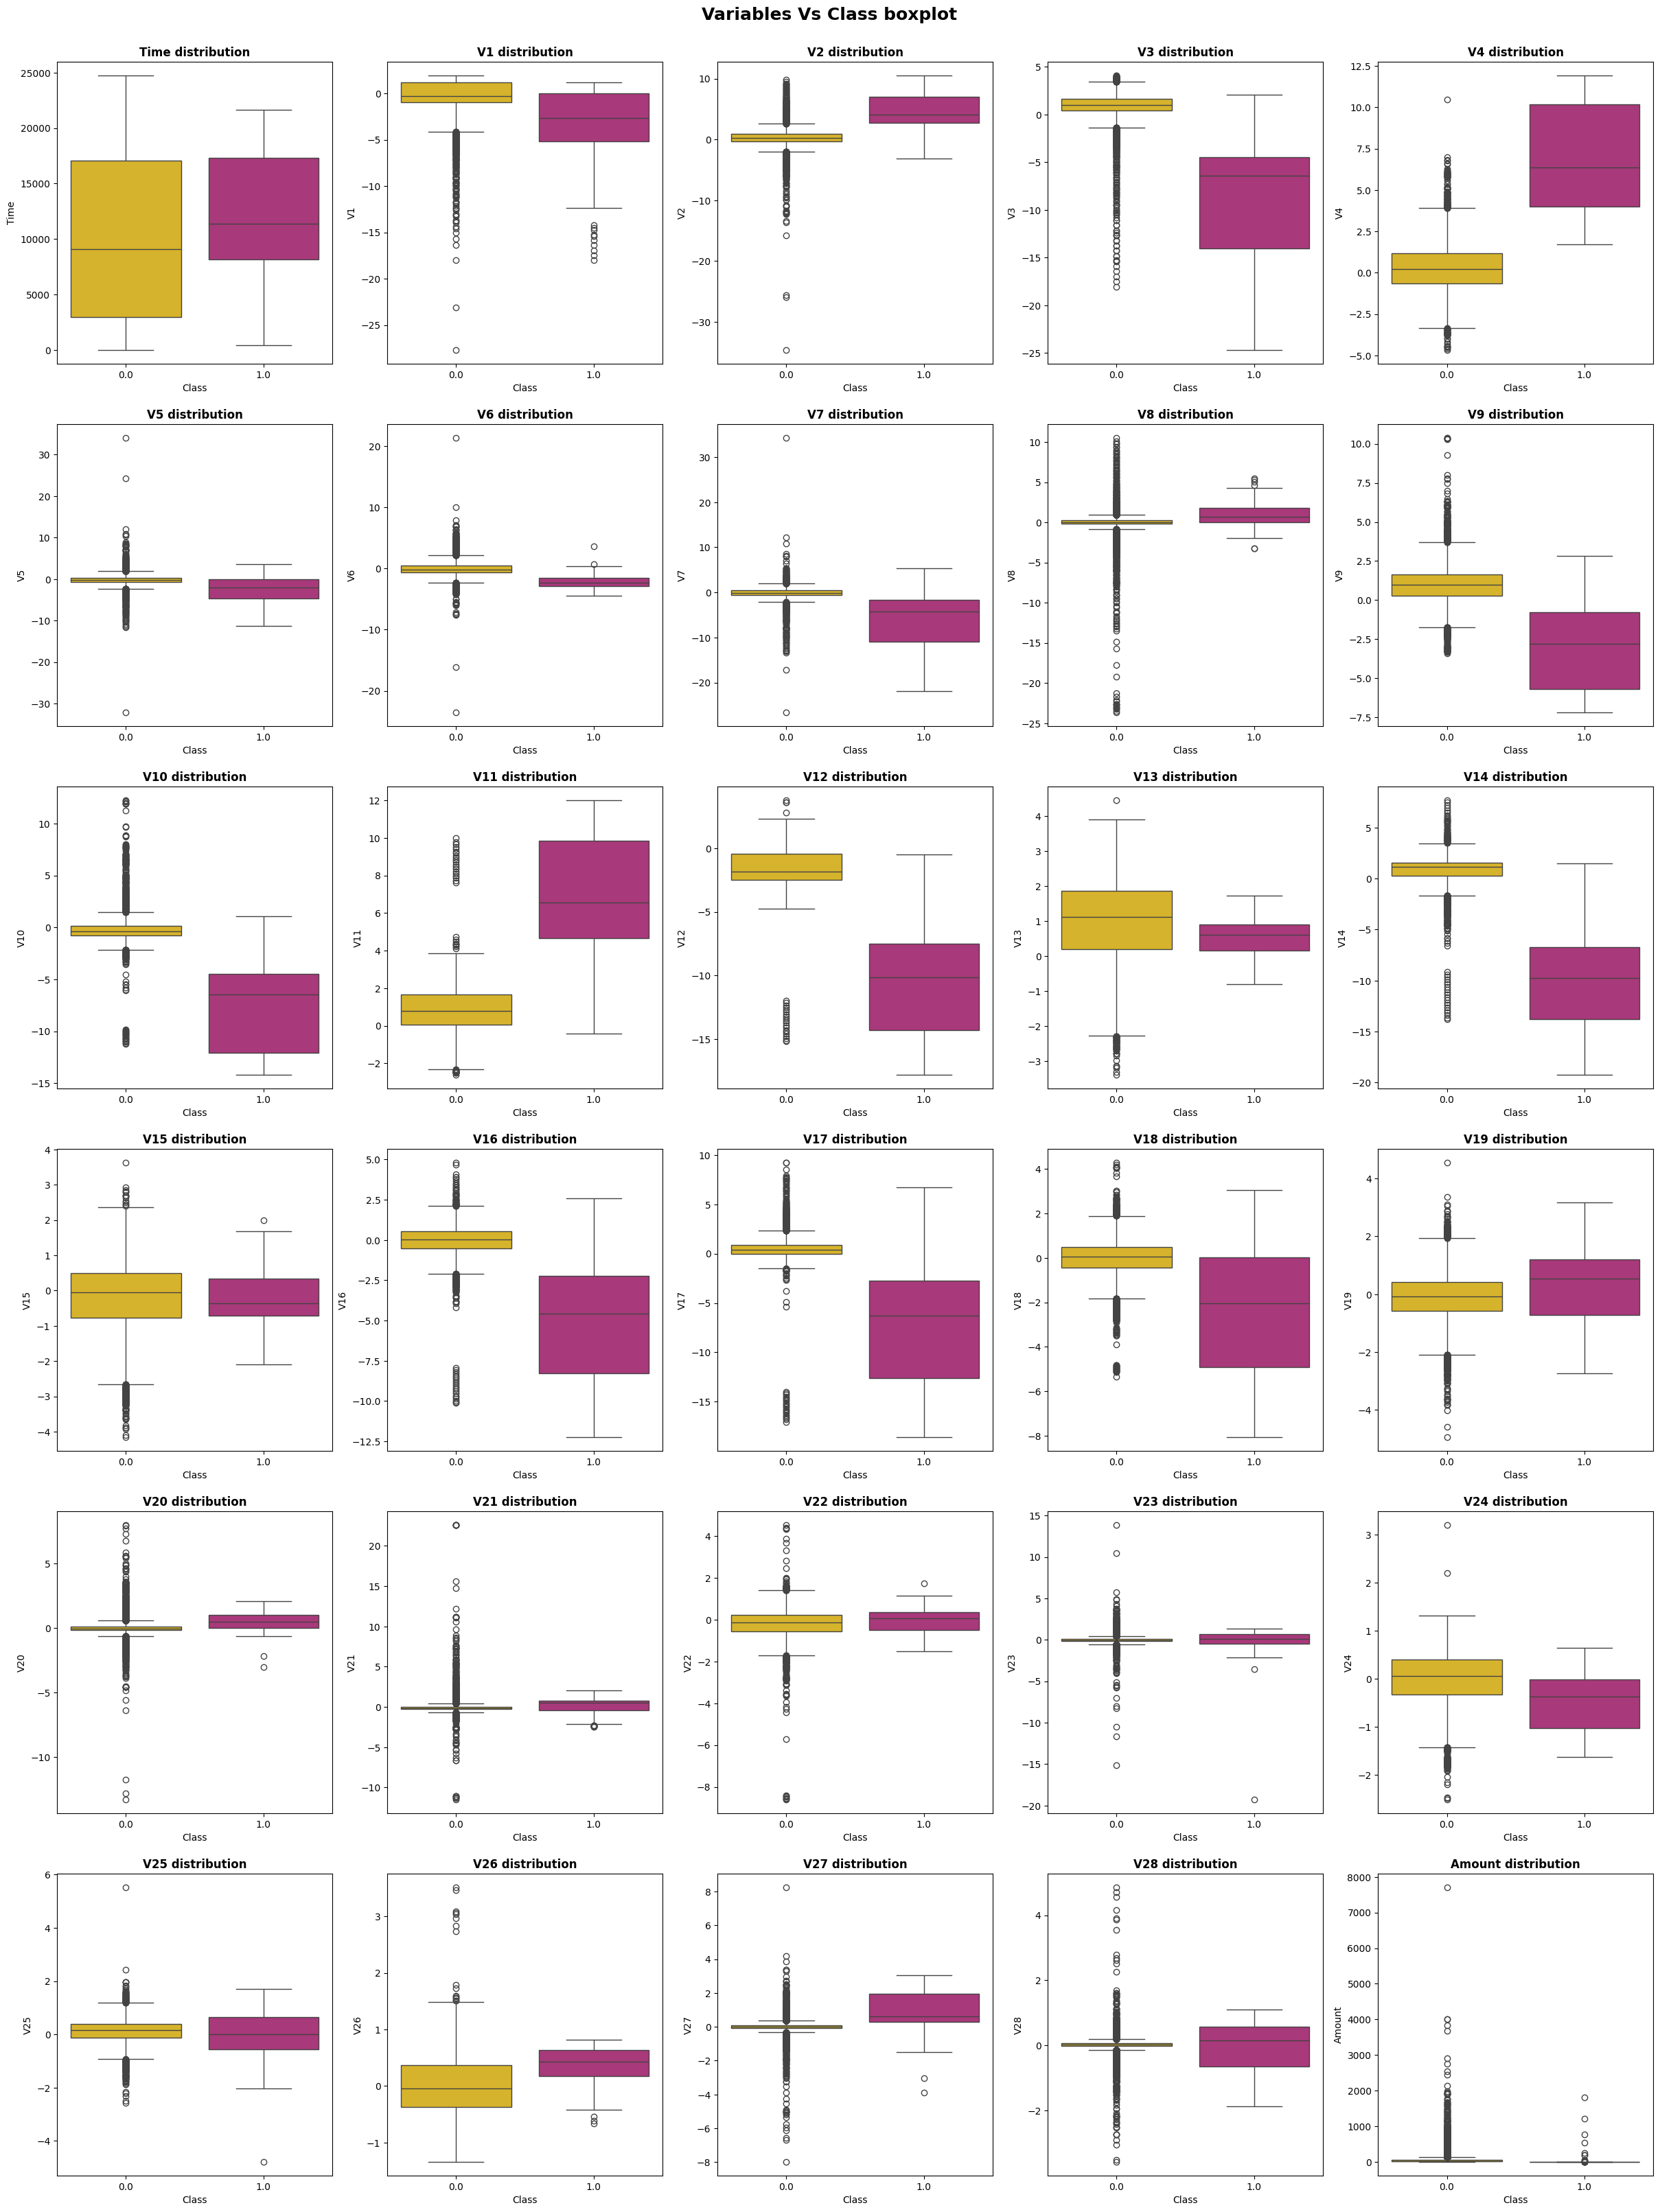

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(30,40))
fig.suptitle('Variables Vs Class boxplot', size = 18, y=0.9, fontweight='bold')
fila=0
colum=0

for i in df.columns[:-1]:
  sns.boxplot(ax=axes[fila,colum], data=df, x='Class', y=i, palette=colors)
  axes[fila,colum].set_title(f"{i} distribution",fontweight='bold')
  colum= colum+1
  if colum == 5:
    colum=0
    fila+=1

In [ ]:
df_reduction["Visual"]=[0, 1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0, 1,0, 0, 0, 0, 0, 1,0, 0]

#Anova

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']
f_scores = f_classif(x,y)

In [ ]:
p_values = f_scores[1]
alpha = 0.05
significacia = []
for i in range(len(p_values)):
  p = p_values[i]
  if p < alpha:
    significacia.append(1)
  else:
    significacia.append(0)
df_reduction["Anova"]=significacia
df_reduction

,Anova,Visual,Chi2,Selection
Time,1,0,0,2
V1,1,1,0,2
V2,1,1,0,2
V3,1,1,1,3
V4,1,1,1,3
V5,1,1,0,2
V6,1,1,0,2
V7,1,1,0,2
V8,1,1,0,2
V9,1,1,1,3


In [ ]:

x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:

f_scores = f_classif(x,y)

In [ ]:
p_values = f_scores[1]
alpha = 0.05
significacia = []
for i in range(len(p_values)):
  p = p_values[i]
  if p < alpha:
    significacia.append(1)
  else:
    significacia.append(0)
df_reduction["Anova"]=significacia
df_reduction["Visual"]=significacia
df_reduction

,Anova,Visual,Chi2,Selection
Time,1,1,0,2
V1,1,1,0,2
V2,1,1,0,2
V3,1,1,1,3
V4,1,1,1,3
V5,1,1,0,2
V6,1,1,0,2
V7,1,1,0,2
V8,1,1,0,2
V9,1,1,1,3


#Chi Squared

In [ ]:

columns = df.columns[:-1]

In [ ]:

# Create a copy of the DataFrame
df_scale = df.copy()

# Apply Min-Max scaling to specified columns
df_scale[columns] = MinMaxScaler().fit_transform(df_scale[columns])

# Separate features (x) and target variable (y)
x = df_scale.drop('Class', axis=1)
y = df_scale['Class']

# Perform chi-squared test
chi_squared = chi2(x, y)

# Extract p-values from the chi-squared test results
p_values = chi_squared[1]

# Set the significance level and create a list to store significance results
alpha = 0.05
significance = []

# Determine significance for each p-value
for i in range(len(p_values)):
    p = p_values[i]
    if p < alpha:
        significance.append(1)
    else:
        significance.append(0)

# Add the Chi-squared test results to the DataFrame for reduction
df_reduction["Chi2"] = significance

In [ ]:
df_reduction

,Anova,Visual,Chi2,Selection
Time,1,1,0,2
V1,1,1,0,2
V2,1,1,0,2
V3,1,1,1,3
V4,1,1,1,3
V5,1,1,0,2
V6,1,1,0,2
V7,1,1,0,2
V8,1,1,0,2
V9,1,1,1,3


In [ ]:
df_reduction["Selection"]= df_reduction['Anova']+df_reduction['Chi2']+df_reduction['Visual']

In [ ]:
df_reduction

,Anova,Visual,Chi2,Selection
Time,1,1,0,2
V1,1,1,0,2
V2,1,1,0,2
V3,1,1,1,3
V4,1,1,1,3
V5,1,1,0,2
V6,1,1,0,2
V7,1,1,0,2
V8,1,1,0,2
V9,1,1,1,3


In [ ]:
columns_final = list(df_reduction[df_reduction["Selection"]>=2].index.values)
columns_final = columns_final + ["Class"]

In [ ]:
columns_final

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'Class']

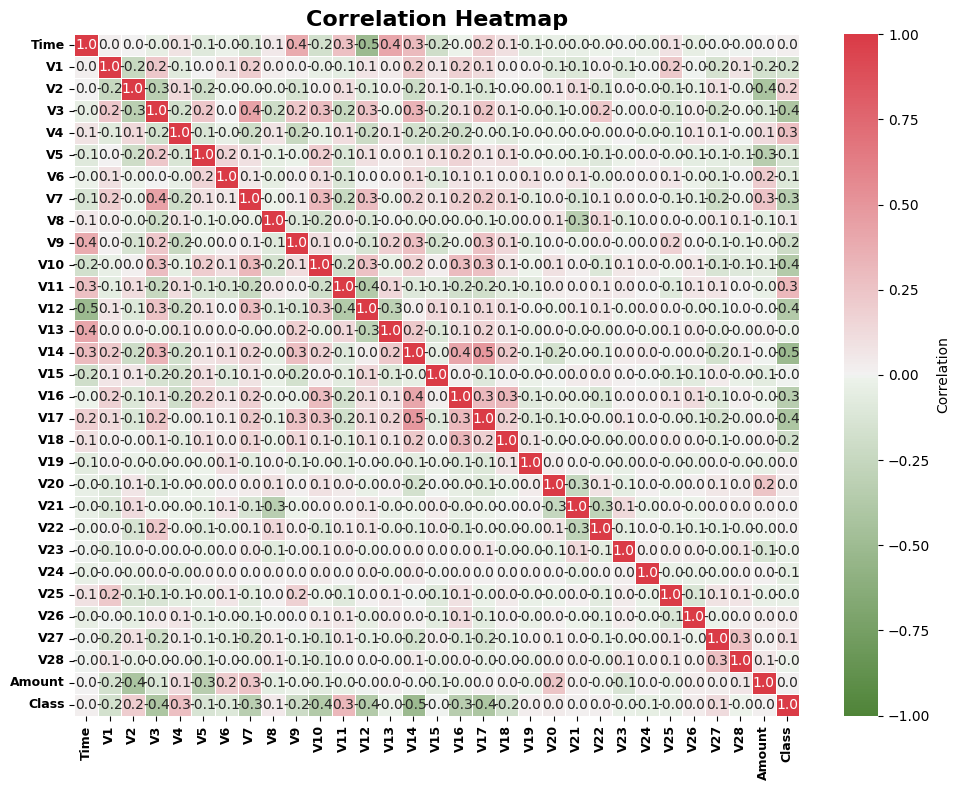

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap with seaborn
plt.figure(figsize=(10, 8))
cmap_custom = sns.diverging_palette(120, 10, as_cmap=True)

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap=cmap_custom, fmt='.1f', linewidths=0.5, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'})

# Add a title
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Adjust the font size of the axis labels
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')

# Adjust the spacing between the labels and the heatmap
plt.tight_layout()

# Show the heatmap
plt.show()


#Preprocessing




#Train/test Split

In [ ]:
x = df.drop(columns='Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9767, 30)
(9767,)
(4187, 30)
(4187,)


In [ ]:
zeros_count_or = (y_train == 0).sum().sum()
ones_count_or = (y_train == 1).sum().sum()

zeros_percentage_or = (zeros_count_or / len(y_train)) * 100
ones_percentage_or = (ones_count_or / len(y_train)) * 100

print(f"Not fraud in the original training data: {zeros_percentage_or:.2f}%")
print(f"Fraud in the original training data: {ones_percentage_or:.2f}%\n")

print("Number Fraud points in the original training data:", zeros_count_or)
print("Number Not fraud points in the original training data:", ones_count_or)

Not fraud in the original training data: 99.53%
Fraud in the original training data: 0.47%

Number Fraud points in the original training data: 9721
Number Not fraud points in the original training data: 46


In [ ]:

from sklearn.utils import resample

train_df = pd.concat([X_train,y_train],axis=1)


not_fraud = train_df[train_df.Class==0]
fraud = train_df[train_df .Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace = True, # sample with replacement
                          n_samples = len(not_fraud), # match number in majority class
                          random_state = 27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

zeros_count = (upsampled.Class == 0).sum()
ones_count = (upsampled.Class == 1).sum()
total_count = len(upsampled)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print("Number of Fraud points in oversampled data:", ones_count)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 9721
Number of Fraud points in oversampled data: 9721


#Data Imbalance Techniques




#oversampling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

In [ ]:
# Initialize a dictionary to store results
results = {}

# Extract feature columns and target variable column
x_cols = columns_final[:-1]
y_col = columns_final[-1]
x_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

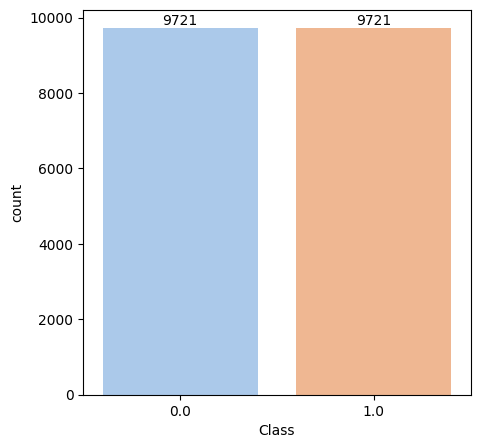

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = upsampled['Class'], data = upsampled, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

#Rabdom Oversampling Using Imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
random_oversampler = RandomOverSampler(sampling_strategy='auto')
X_train_over, y_train_over = random_oversampler.fit_resample(X_train, y_train)
X_test_over, y_test_over = random_oversampler.fit_resample(X_test, y_test)

zeros_count = (y_train_over == 0).sum()
ones_count = (y_train_over == 1).sum()
total_count = len(y_train_over)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print(f"Number of Fraud points in oversampled data:, {ones_count}\n")

print(X_train_over.shape)
print(y_train_over.shape)
print(X_test_over.shape)
print(y_test_over.shape)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 9721
Number of Fraud points in oversampled data:, 9721

(19442, 30)
(19442,)
(8354, 30)
(8354,)


#SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
sm = SMOTE(random_state = 42, sampling_strategy='auto')
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)


zeros_count = (y_train_sm == 0).sum()
ones_count = (y_train_sm == 1).sum()
total_count = len(y_train_sm)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print(f"Number of Fraud points in oversampled data:, {ones_count}\n")

print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test_sm.shape)
print(y_test_sm.shape)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 9721
Number of Fraud points in oversampled data:, 9721

(19442, 30)
(19442,)
(8354, 30)
(8354,)


#Undersampling

In [ ]:
nfraud_undersampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
undersampled = pd.concat([nfraud_undersampled, fraud])

zeros_count = (undersampled.Class == 0).sum()
ones_count = (undersampled.Class == 1).sum()
total_count = len(undersampled)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 46
Number of Fraud points in undersampled data: 46


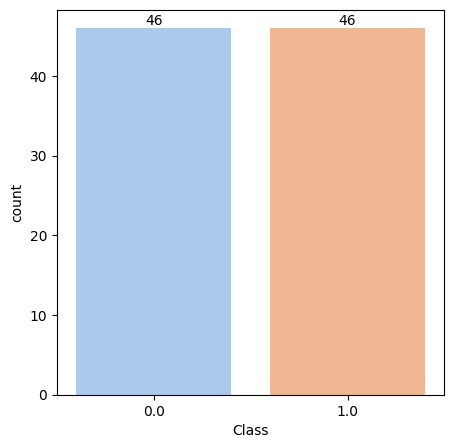

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = undersampled['Class'], data = upsampled, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

#Random UnderSampling using imblearn

In [ ]:
random_undsampler = RandomUnderSampler(sampling_strategy='auto')
X_train_under, y_train_under = random_undsampler.fit_resample(X_train, y_train)
X_test_under, y_test_under = random_undsampler.fit_resample(X_test, y_test)

# Calculate the counts and percentages
zeros_count = (y_train_under == 0).sum()
ones_count = (y_train_under == 1).sum()
total_count = len(y_train_under)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print(f"Number of Fraud points in undersampled data:, ones_count\n")

print(X_train_under.shape)
print(y_train_under.shape)
print(X_test_under.shape)
print(y_test_under.shape)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 46
Number of Fraud points in undersampled data:, ones_count

(92, 30)
(92,)
(20, 30)
(20,)


In [ ]:
y_baseline = df['Class'].value_counts(normalize=True).max()
print(f'baseline score = {y_baseline}')

baseline score = 0.9959868138168267


#Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay ,f1_score,recall_score,precision_score
import itertools
import warnings
warnings.filterwarnings('ignore')
# logistic model for our normal data and oversampled data and undersampled
log = LogisticRegression(max_iter=400)
logover = LogisticRegression(max_iter=400)
logunder = LogisticRegression(max_iter=400)

# fit our normal data
log.fit(X_train,y_train)

# fit our oversampled data
logover.fit(X_train_over,y_train_over)

# fit our oversampled data
logunder.fit(X_train_under,y_train_under)

LogisticRegression(max_iter=400)

#Evaluate



#Train Data


In [ ]:
# get the prediction score for our logistic Regression model on our train data
print(f'The accuracy score for logistic Regression Model On Normal Data = {accuracy_score(y_train,log.predict(X_train))}')
print(f'The accuracy score for logistic Regression Model On Oversampled Data = {accuracy_score(y_train,logover.predict(X_train))}')
print(f'The accuracy score for logistic Regression Model On Undersampled Data = {accuracy_score(y_train,logunder.predict(X_train))}')

The accuracy score for logistic Regression Model On Normal Data = 0.9986689874065732
The accuracy score for logistic Regression Model On Oversampled Data = 0.98310637862189
The accuracy score for logistic Regression Model On Undersampled Data = 0.9622197194634995


#Test Data

In [ ]:
# get the prediction score for our logistic Regression model on our test data
print(f'The accuracy score for logistic Regression Model On Normal Data = {accuracy_score(y_test,log.predict(X_test))}')
print(f'The accuracy score for logistic Regression Model On Oversampled Data = {accuracy_score(y_test,logover.predict(X_test))}')
print(f'The accuracy score for logistic Regression Model On Undersampled Data = {accuracy_score(y_test,logunder.predict(X_test))}')

The accuracy score for logistic Regression Model On Normal Data = 0.9990446620492
The accuracy score for logistic Regression Model On Oversampled Data = 0.9780272271315978
The accuracy score for logistic Regression Model On Undersampled Data = 0.9553379508000955


**#Confusion Matrix And Classification Report**

In [ ]:
# Make Confusion matrix function to see more details about our model perdiction

def confusion(model, x, y, title=None):
    predictions = model.predict(x)
    display = ConfusionMatrixDisplay.from_estimator(model, x, y)

    # Check if a title is provided
    if title:
        display.figure_.suptitle(title, y=1.02)

In [ ]:
# function to evaluate model
def evalua(model,x,y):
    print('precision_score =',precision_score(y,model.predict(x)).round(2)*100,'%')
    print('recall_score =',recall_score(y,model.predict(x)).round(2)*100,'%')
    print('f1_score =',f1_score(y,model.predict(x)).round(2)*100,'%')
    print('**************************************')

#Log Models

In [ ]:
# print log models score
print('Normal Data')
evalua(log,X_test,y_test)

print('Oversampled Data')
evalua(logover,X_test,y_test)

print('Undersampled Data')
evalua(logunder,X_test,y_test)

Normal Data
precision_score = 75.0 %
recall_score = 90.0 %
f1_score = 82.0 %
**************************************
Oversampled Data
precision_score = 10.0 %
recall_score = 100.0 %
f1_score = 18.0 %
**************************************
Undersampled Data
precision_score = 5.0 %
recall_score = 100.0 %
f1_score = 10.0 %
**************************************


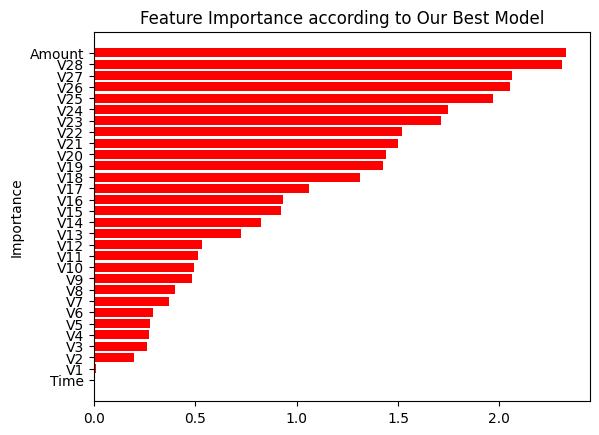

In [ ]:
# Our Higest Recall and precision and f1 score is over# Get the feature importances
importance = abs(logover.coef_[0])
importance.sort()

# Plot the feature importances
plt.barh(x.columns, importance,color='r')
plt.title('Feature Importance according to Our Best Model')
plt.ylabel('Importance')
plt.show()

None


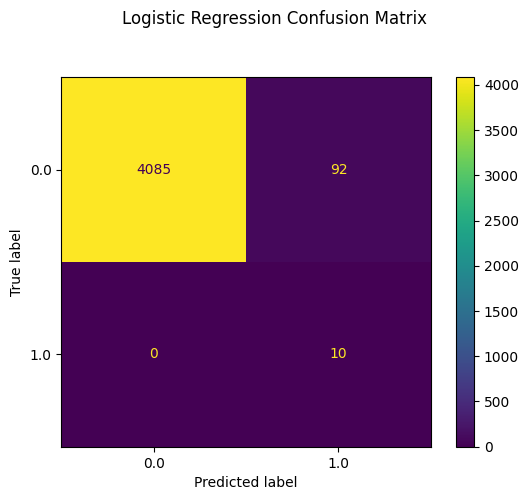

In [ ]:

#sampled data
print(confusion(logover,X_test,y_test,"Logistic Regression Confusion Matrix"))

#Random Forest

In [ ]:
 # logistic model for our normal data and oversampled data and undersampled
rf = RandomForestClassifier()
rfover = RandomForestClassifier()
rfunder = RandomForestClassifier()

# fit our normal data
rf.fit(X_train,y_train)

# fit our oversampled data
rfover.fit(X_train_over,y_train_over)

# fit our oversampled data
rfunder.fit(X_train_under,y_train_under)

RandomForestClassifier()

# Evaluate

#Train data

In [ ]:
# get the prediction score for our Random Forest Classification model on our train data
print(f'The accuracy score for Random Forest Classification Model On Normal Data = {accuracy_score(y_train,rf.predict(X_train))}')
print(f'The accuracy score for Random Forest Classification Model On Oversampled Data = {accuracy_score(y_train,rfover.predict(X_train))}')
print(f'The accuracy score for Random Forest Classification Model On Undersampled Data = {accuracy_score(y_train,rfunder.predict(X_train))}')

The accuracy score for Random Forest Classification Model On Normal Data = 1.0
The accuracy score for Random Forest Classification Model On Oversampled Data = 1.0
The accuracy score for Random Forest Classification Model On Undersampled Data = 0.9869970308180608


#Test Data

In [ ]:
# get the prediction score for our Random Forest Classification model on our test data
print(f'The accuracy score for Random Forest Classification Model On Normal Data = {accuracy_score(y_test,rf.predict(X_test))}')
print(f'The accuracy score for Random Forest Classification Model On Oversampled Data = {accuracy_score(y_test,rfover.predict(X_test))}')
print(f'The accuracy score for Random Forest Classification Model On Undersampled Data = {accuracy_score(y_test,rfunder.predict(X_test))}')

The accuracy score for Random Forest Classification Model On Normal Data = 0.9997611655123
The accuracy score for Random Forest Classification Model On Oversampled Data = 0.9997611655123
The accuracy score for Random Forest Classification Model On Undersampled Data = 0.9816097444470981


# Log Models

In [ ]:
# print log models score
print('Normal Data')
evalua(rf,X_test,y_test)

print('Oversampled Data')
evalua(rfover,X_test,y_test)

print('Undersampled Data')
evalua(rfunder,X_test,y_test)

Normal Data
precision_score = 91.0 %
recall_score = 100.0 %
f1_score = 95.0 %
**************************************
Oversampled Data
precision_score = 91.0 %
recall_score = 100.0 %
f1_score = 95.0 %
**************************************
Undersampled Data
precision_score = 11.0 %
recall_score = 100.0 %
f1_score = 21.0 %
**************************************


#Confusion Matrix

None


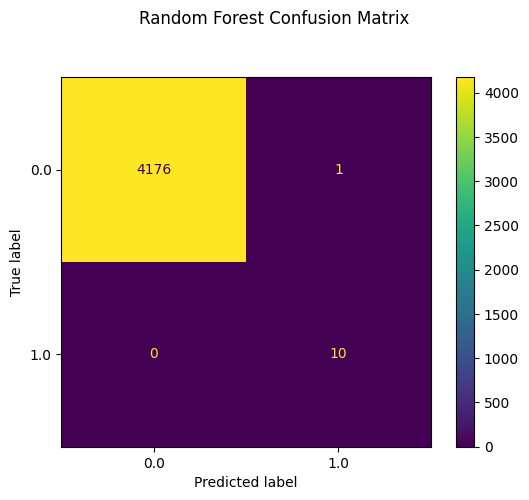

In [ ]:
print(confusion(rfover,X_test,y_test,"Random Forest Confusion Matrix"))